In [4]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

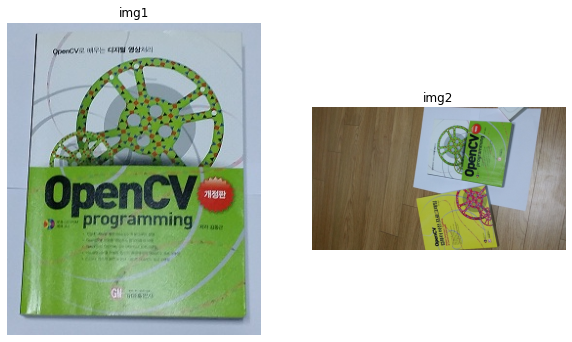

In [5]:
src1_bgr = cv2.imread('./data/book1.jpg')
src2_bgr = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1_bgr,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2_bgr,cv2.COLOR_BGR2GRAY)
src1_rgb = cv2.cvtColor(src1_bgr,cv2.COLOR_BGR2RGB)
src2_rgb = cv2.cvtColor(src2_bgr,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,30))
imgae=plt.subplot(1,2,1)
imgae.set_title('img1')
plt.axis('off')
plt.imshow(src1_rgb)

imgae=plt.subplot(1,2,2)
imgae.set_title('img2')
plt.axis('off')
plt.imshow(src2_rgb)

len(matches)= 340
matches[0]=(queryIdx:310, trainIdx:215, distance:10.0)
matches[1]=(queryIdx:413, trainIdx:328, distance:12.0)
matches[2]=(queryIdx:355, trainIdx:127, distance:15.0)
matches[3]=(queryIdx:430, trainIdx:361, distance:15.0)
matches[4]=(queryIdx:236, trainIdx:148, distance:16.0)
matches[5]=(queryIdx:615, trainIdx:459, distance:17.0)
matches[6]=(queryIdx:685, trainIdx:650, distance:17.0)
matches[7]=(queryIdx:224, trainIdx:149, distance:18.0)
matches[8]=(queryIdx:428, trainIdx:391, distance:18.0)
matches[9]=(queryIdx:495, trainIdx:385, distance:18.0)


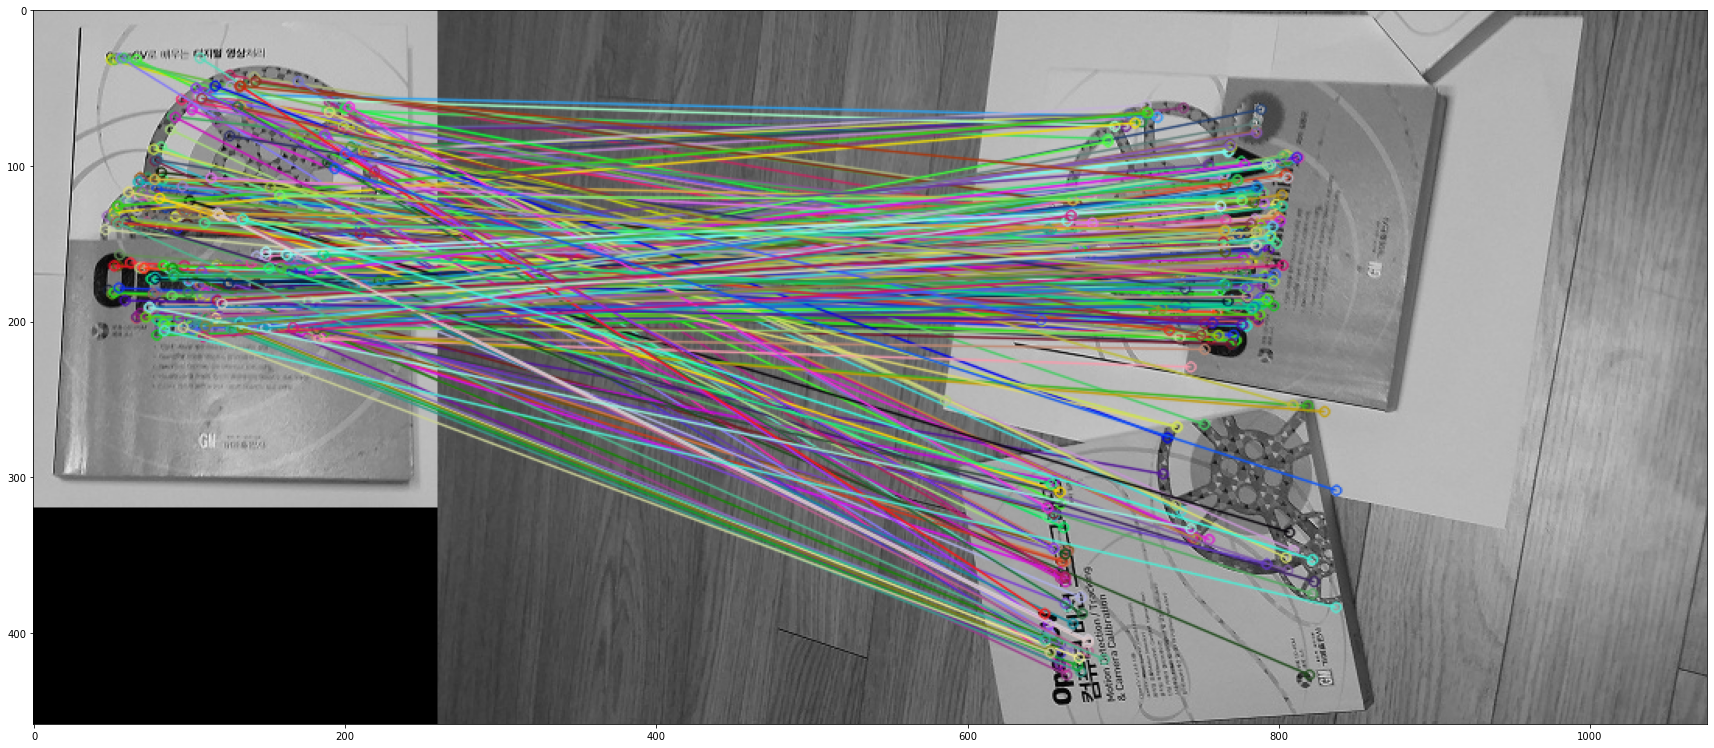

In [8]:
# 1. descriptor
orb = cv2.ORB_create(nfeatures=1000)
brisk = cv2.BRISK_create()
detector = [orb, brisk]

didx = 0 #ord = 0, brisk = 1
kp1, des1 = detector[didx].detectAndCompute(img1, None)
kp2, des2 = detector[didx].detectAndCompute(img2, None)

# 2. matcher
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
flann = cv2.FlannBasedMatcher_create()
matcher = [bf, flann]

midx = 0 # bf = 0, flann = 1
try:
    matches = matcher[midx].match(des1,des2)
except:
    matches = matcher[midx].match(np.float32(des1),np.float32(des2))

# result display
matches = sorted(matches, key = lambda x:x.distance)
print('len(matches)=',len(matches)) 
for i,m in enumerate(matches[:10]):
    print('matches[{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(i,m.queryIdx,m.trainIdx,m.distance))
    
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
plt.figure(figsize=(30,60))
plt.imshow(img3)
plt.show()

len(good_matches)= 22


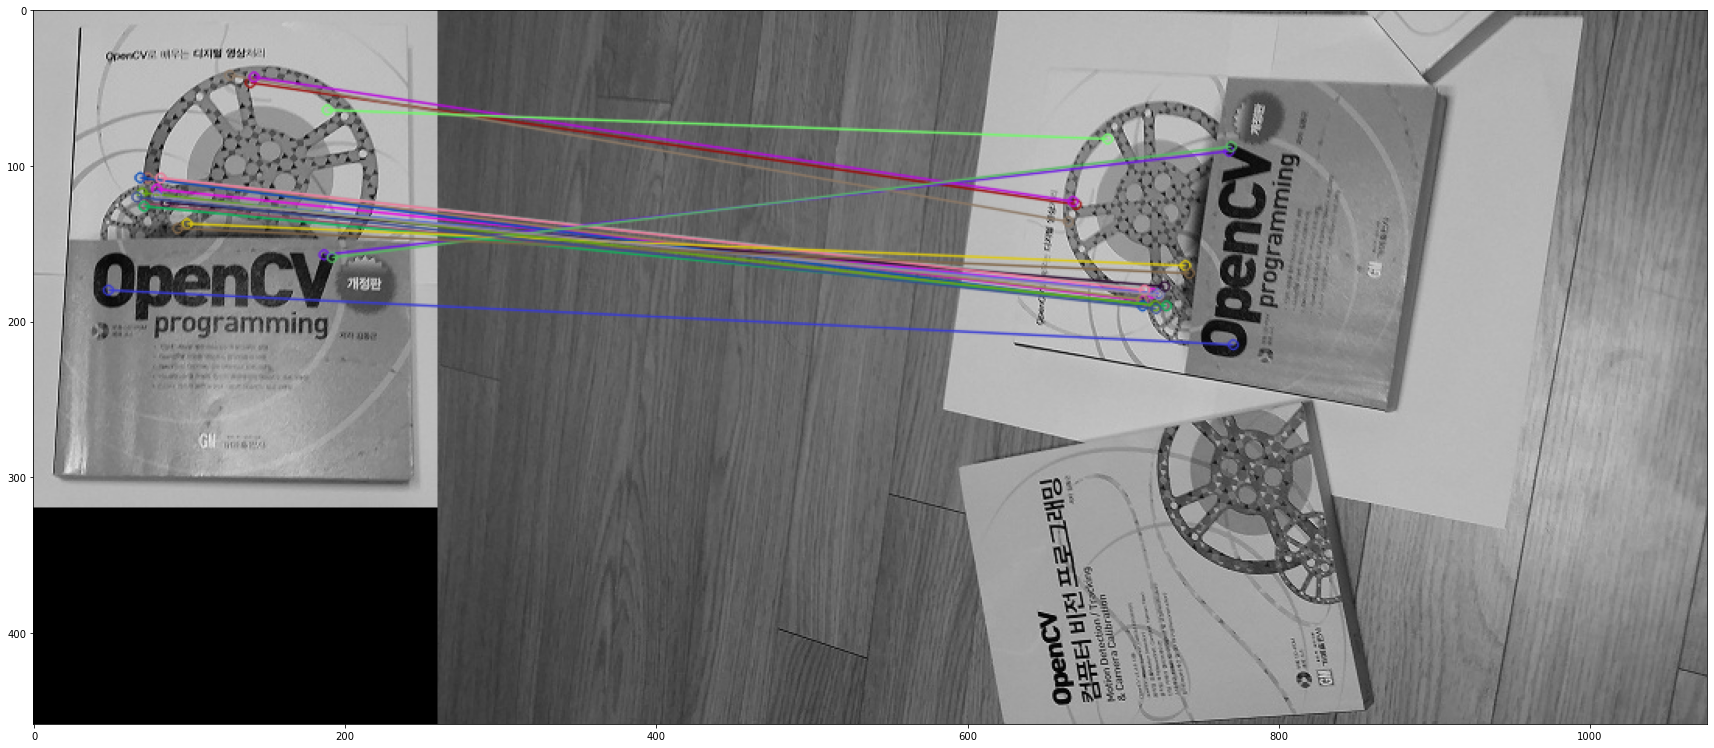

In [9]:
# draw only good matching
minDist = matches[1].distance
good_matches = list(filter(lambda m:m.distance<=2*minDist, matches))
print('len(good_matches)=',len(good_matches))    
if len(good_matches) < 5:
    print('sorry,too small good matches')
    #exit()
    
img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.figure(figsize=(30,60))
plt.imshow(img4)
plt.show()